**데이터 전처리**
- Null 처리
- 불필요한 속성 제거
- 인코딩 수행


**모델 학습 및 검증/예측/평가**
- 결정트리, 랜덤포레스트, 로지스틱 회귀 학습 비교
- K폴드 교차 검증
- cross_val_score()와 GridSearchCV() 수행

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
cd ../1장/titanic

C:\Users\qotnd\00_인프런 인강\1장


In [11]:
ls

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 336C-CA6E

 C:\Users\qotnd\00_인프런 인강\1장 디렉터리

2023-07-12  오후 01:22    <DIR>          .
2023-07-04  오후 12:58    <DIR>          ..
2023-07-10  오전 09:45    <DIR>          .ipynb_checkpoints
2023-07-04  오후 04:25            25,022 1.3 넘파이.ipynb
2023-07-12  오후 01:22         1,020,491 1.4 데이터 핸들링 - 판다스.ipynb
2023-07-04  오후 12:40    <DIR>          titanic
               2개 파일           1,045,513 바이트
               4개 디렉터리  104,032,567,296 바이트 남음


In [15]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- PassengerId : 탑승자 데이터 일련번호
- survivied : 생존 여부 , 0 = 사망, 1 = 생존
- Pclass : 티켓의 선실등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
- sex : 탑승자 성별
- name : 탑승자 이름
- sibsp : 같이 탑승한 형제자매 또는 배우자 인원 수
- parch : 같이 탑승한 부모님 또는 어린이 인원 수
- ticket : 티켓 번호
- fare : 요금
- cabin : 선실 번호
- embarked : 중간 정착 항구/C = Cherbourg, Q = Queenstown, S = Southampton

In [16]:
print('### train 데이터 정보 ### \n')
print(titanic_df.info())

### train 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [17]:
# titanic_df.describe()
titanic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [29]:
# object인 값 추출 코드1 >> 얘가 더 직관적이다.
titanic_df.dtypes[titanic_df.dtypes=="object"].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [34]:
# object인 값 추출코드2
titanic_df.select_dtypes(include = ["object"])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


##### Null 컬럼들에 대한 처리

In [37]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace = True)
titanic_df["Cabin"].fillna("N", inplace = True)
titanic_df["Embarked"].fillna("N", inplace = True)

In [38]:
print("데이터 세트 Null값 개수 : ", titanic_df.isnull().sum().sum())

데이터 세트 Null값 개수 :  0


##### 주요 컬럼 EDA

In [41]:
# object 컬럼타입 추출
titanic_df.dtypes[titanic_df.dtypes =="object"].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [44]:
titanic_df.select_dtypes(include = ["object"]).columns.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [45]:
print("Sex값 분포 : \n", titanic_df["Sex"].value_counts())
print("\nCabin 값 분포 : \n", titanic_df["Cabin"].value_counts())
print("\nEmbarked 값 분포 : \n", titanic_df["Embarked"].value_counts())

Sex값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F33              3
              ... 
D45              1
D11              1
B39              1
B50              1
E46              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [49]:
# Series.str >> 각 값의 문자를 나타냄
titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [51]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [52]:
titanic_df.groupby(["Sex", "Survived"])

In [56]:
titanic_df.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [57]:
titanic_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

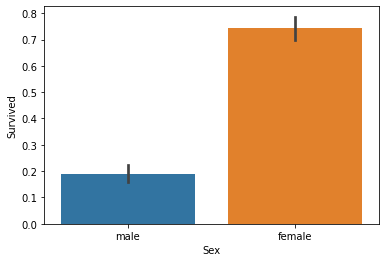

In [58]:
sns.barplot(x = "Sex", y = "Survived", data = titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

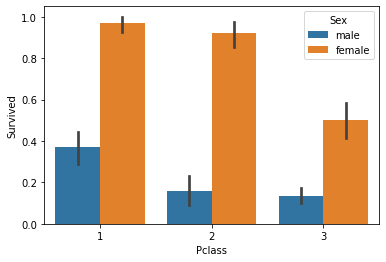

In [59]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = titanic_df)

In [60]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
               
    return cat

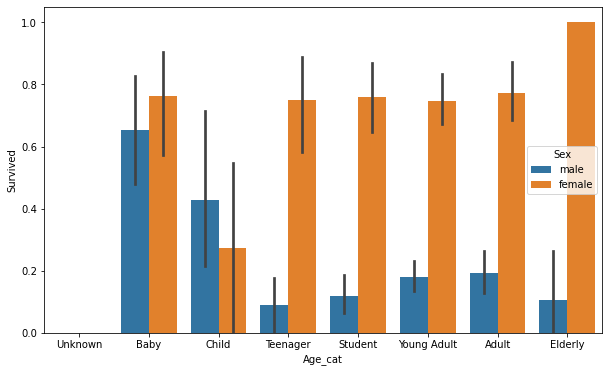

In [64]:
# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize = (10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정(seaborn에서 표현)
groups_names = ["Unknown", "Baby", "Child", "Teenager", "Student", "Young Adult", "Adult","Elderly"]

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정.
# get_category(X)는 입력값으로  'Age' 컬럼값을 받아서 해당하는 cat반환
titanic_df["Age_cat"] = titanic_df["Age"].apply(lambda x:get_category(x))

sns.barplot(x = "Age_cat", y = "Survived", hue = "Sex", data = titanic_df, order = groups_names)
titanic_df.drop("Age_cat", axis = 1, inplace = True)

In [68]:
# 라벨인코딩 함수
from sklearn.preprocessing import LabelEncoder

def encode_features(encoding_features, dataDF):
    '''
        encoding_features는 encoding이 필요한 변수들을 리스트 형식으로 입력합니다.
    '''
    
    le = LabelEncoder()
    for feature in encoding_features:
        le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [69]:
encoding_features = ["Cabin", "Sex", "Embarked"]

In [70]:
titanic_df = encode_features(encoding_features, titanic_df)

In [72]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [73]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [75]:
titanic_df = pd.read_csv("train.csv")
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived", axis = 1)

In [76]:
X_titanic_df = transform_features(X_titanic_df)

##### 모델링

In [77]:
# 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                   test_size = 0.2, random_state = 11)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression(solver = "liblinear")

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassfier 정확도 : {:.4f}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도 : {:.4f}".format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도 : {:.4f}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassfier 정확도 : 0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8659


In [81]:
# KFold 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train ,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계싼
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))

In [82]:
# exec_kfold 호출
exec_kfold(dt_clf)

교차검증 0 정확도 : 0.7542
교차검증 1 정확도 : 0.7809
교차검증 2 정확도 : 0.7865
교차검증 3 정확도 : 0.7697
교차검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [85]:
# 위의 kfold과정을 사이킷런에서 cross_val_score로 제공해준다.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for i, acc in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(i, acc))
    
print("평균 정확도 : {:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [87]:
from sklearn.model_selection import GridSearchCV

In [90]:
# GridSearchCV

params = {
    "max_depth" : [2,3,5,10],
    "min_samples_split" : [2,3,5],
    "min_samples_leaf" : [1,5,8]
}

grid_dclf = GridSearchCV(dt_clf, param_grid = params, scoring = "accuracy", cv = 5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 : ", grid_dclf.best_params_)
print("GridSearchCV 최고 정확도 : {:.4f}".format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992


In [91]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행(Test 데이터셋)
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {:.4f}".format(accuracy))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
